In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")

# Importation of data from sql server

In [2]:
import mysql.connector

# Connect to the MySQL database
db_config = {
    "host":"localhost",
    "user":"root",
    "password":"12345",
    "database":"new_schema",
}

conn=mysql.connector.connect(**db_config)


In [3]:
query="SELECT * FROM new_schema.adult_income1"
Inc=pd.read_sql(query,conn)

In [4]:
Inc.head(15)            #check the top 5 rows of the Dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K
5,17,Private,225106,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K
6,17,Local-gov,170916,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K
7,17,Federal-gov,99893,11th,7,Never-married,occupation,Not-in-family,Black,Female,United-States,<=50K
8,17,Private,218361,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K
9,17,Private,132680,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K


In [5]:
Inc.shape                         #Checking Dataset shape

(31947, 12)

In [6]:
Inc.nunique()

age                  73
workclass             9
fnlwgt            21381
education            16
education.num        16
marital.status        7
occupation           16
relationship          6
race                  5
sex                   2
native.country       42
income                2
dtype: int64

In [7]:
Inc.relationship.value_counts()

Husband           12932
Not-in-family      8154
Own-child          4994
Unmarried          3384
Wife               1532
Other-relative      951
Name: relationship, dtype: int64

In [8]:
Inc.sex.value_counts()

Male      21349
Female    10598
Name: sex, dtype: int64

# Data Cleaning process

In [9]:
Inc.isnull().sum()                     #check how many null values are present in Dataset

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [10]:
Inc.dtypes                             #Check how many columns are numerical & how many categorical

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
native.country    object
income            object
dtype: object

In [11]:
Inc.columns                             #checking columns in Dataset       

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'native.country', 'income'],
      dtype='object')

In [12]:
Inc.rename(columns={'marital.status':'marital_status'},inplace=True)
Inc.rename(columns={'native.country':'native_country'},inplace=True)

In [13]:
Inc.describe().T

,count,mean,std,min,25%,50%,75%,max
age,31947.0,38.570695,13.646280,17.0,28.0,37.0,48.0,90.0
fnlwgt,31947.0,189731.936144,105756.699323,12285.0,117627.5,178312.0,237453.5,1484705.0
education.num,31947.0,10.071149,2.561430,1.0,9.0,10.0,12.0,16.0


In [247]:
Inc['workclass'].value_counts()

3    24064
5     2499
1     2067
6     1279
4     1074
0      943
7       14
2        7
Name: workclass, dtype: int64

### Filling ? values

In [17]:
Inc['workclass'] = Inc['workclass'].replace('?', 'Private')
Inc['occupation'] = Inc['occupation'].replace('?', 'Prof-specialty')
Inc['native_country'] = Inc['native_country'].replace('?', 'United-States')

In [18]:
# education Category
Inc.education= Inc.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
Inc.education = Inc.education.replace('HS-grad', 'high school')
Inc.education = Inc.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
Inc.education = Inc.education.replace('Bachelors', 'undergrad')
Inc.education = Inc.education.replace('Masters', 'grad')
Inc.education = Inc.education.replace('Doctorate', 'doc')



In [19]:
#martial status
Inc['marital_status']= Inc['marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
Inc['marital_status']= Inc['marital_status'].replace(['Never-married'], 'not-married')
Inc['marital_status']= Inc['marital_status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [20]:
###D-Type Conversion

In [21]:
from sklearn.preprocessing import LabelEncoder            #import labelencoder for dtype conversion
le=LabelEncoder()

In [22]:
Inc.workclass=le.fit_transform(Inc.workclass)
Inc.education=le.fit_transform(Inc.education)
Inc.marital_status=le.fit_transform(Inc.marital_status)
Inc.occupation=le.fit_transform(Inc.occupation)
Inc.relationship=le.fit_transform(Inc.relationship)
Inc.race=le.fit_transform(Inc.race)
Inc.sex=le.fit_transform(Inc.sex)
Inc.native_country=le.fit_transform(Inc.native_country)
Inc.income=le.fit_transform(Inc.income)


In [23]:
Inc.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
native_country    int32
income            int32
dtype: object

In [24]:
Inc.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
31942    False
31943    False
31944    False
31945    False
31946    False
Length: 31947, dtype: bool

Data is cleaned as now there is no null values,no columns are object & no duplicates value exist

# Base Models After Cleaning

In [25]:
data_x=Inc.iloc[:,:-1]
data_x.head(2)

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,native_country
0,17,3,148522,4,7,1,14,3,4,1,38
1,17,3,93235,4,8,1,14,3,4,0,38


In [26]:
data_y=Inc.iloc[:,11]
data_y.head(2)

0    0
1    0
Name: income, dtype: int32

In [27]:
import sklearn 
from sklearn.model_selection import train_test_split

In [28]:
d_x_train,d_x_test,d_y_train,d_y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=101)

In [29]:
d_x_train.shape,d_x_test.shape,d_y_train.shape,d_y_test.shape

((25557, 11), (6390, 11), (25557,), (6390,))

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [31]:
lg.fit(d_x_train,d_y_train)

LogisticRegression()

In [32]:
p1=lg.predict(d_x_test)

In [33]:
prob=lg.predict_proba(d_x_test)
prob

array([[0.63422545, 0.36577455],
       [0.79955096, 0.20044904],
       [0.73837713, 0.26162287],
       ...,
       [0.64694006, 0.35305994],
       [0.70864397, 0.29135603],
       [0.8483643 , 0.1516357 ]])

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
m1=confusion_matrix(p1,d_y_test)
m1

array([[4867, 1523],
       [   0,    0]], dtype=int64)

In [36]:
lr_ac3=m1.diagonal().sum()/m1.sum()*100
lr_ac3

76.1658841940532

In [37]:
from sklearn.metrics import classification_report
print(classification_report(p1,d_y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      6390
           1       0.00      0.00      0.00         0

    accuracy                           0.76      6390
   macro avg       0.50      0.38      0.43      6390
weighted avg       1.00      0.76      0.86      6390



In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score

lr_pre4 = precision_score(d_y_test,p1)
print('Precision: %f' % lr_pre4)
# recall: tp / (tp + fn)
lr_rec4 = recall_score(d_y_test, p1)
print('Recall: %f' % lr_rec4)
# f1: 2 tp / (2 tp + fp + fn)
lr_f1234 = f1_score(d_y_test, p1)
print('F1 score: %f' % lr_f1234)

Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


In [39]:
df1=pd.DataFrame(prob)
df1

,0,1
0,0.634225,0.365775
1,0.799551,0.200449
2,0.738377,0.261623
3,0.830144,0.169856
4,0.854197,0.145803
...,...,...
6385,0.737795,0.262205
6386,0.732880,0.267120
6387,0.646940,0.353060
6388,0.708644,0.291356


# Decision Tree model

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [41]:
dt.fit(d_x_train,d_y_train)

DecisionTreeClassifier()

In [42]:
dt_p=dt.predict(d_x_test)
dt_p

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
dt.feature_importances_

array([0.17106322, 0.04933313, 0.30639252, 0.01612177, 0.12720296,
       0.20125336, 0.07170189, 0.01237241, 0.01833298, 0.00899145,
       0.01723431])

In [44]:
dt_cf=confusion_matrix(dt_p,d_y_test)
dt_cf

array([[4085,  692],
       [ 782,  831]], dtype=int64)

In [45]:
dt_acc3=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc3

76.93270735524257

In [46]:
print(classification_report(dt_p,d_y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4777
           1       0.55      0.52      0.53      1613

    accuracy                           0.77      6390
   macro avg       0.69      0.69      0.69      6390
weighted avg       0.77      0.77      0.77      6390



In [47]:
from sklearn.metrics import precision_score,recall_score,f1_score

dt_pre4 = precision_score(d_y_test,dt_p)
print('Precision: %f' % dt_pre4)
# recall: tp / (tp + fn)
dt_rec4 = recall_score(d_y_test, dt_p)
print('Recall: %f' % dt_rec4)
# f1: 2 tp / (2 tp + fp + fn)
dt_f1234 = f1_score(d_y_test, dt_p)
print('F1 score: %f' % dt_f1234)

Precision: 0.515189
Recall: 0.545634
F1 score: 0.529974


# Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [49]:
rf.fit(d_x_train,d_y_train)

RandomForestClassifier()

In [50]:
rf_p=rf.predict(d_x_test)
rf_p

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
rf_cf=confusion_matrix(rf_p,d_y_test)
rf_cf

array([[4387,  677],
       [ 480,  846]], dtype=int64)

In [52]:
rf_acc3=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc3

81.89358372456964

In [53]:
print(classification_report(rf_p,d_y_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      5064
           1       0.56      0.64      0.59      1326

    accuracy                           0.82      6390
   macro avg       0.73      0.75      0.74      6390
weighted avg       0.83      0.82      0.82      6390



In [54]:
from sklearn.metrics import precision_score,recall_score,f1_score

rf_pre4 = precision_score(d_y_test,rf_p)
print('Precision: %f' % rf_pre4)
# recall: tp / (tp + fn)
rf_rec4 = recall_score(d_y_test, rf_p)
print('Recall: %f' % rf_rec4)
# f1: 2 tp / (2 tp + fp + fn)
rf_f1234 = f1_score(d_y_test, rf_p)
print('F1 score: %f' % rf_f1234)

Precision: 0.638009
Recall: 0.555483
F1 score: 0.593893


# KNN Model

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [56]:
knn.fit(d_x_train,d_y_train)

KNeighborsClassifier(n_neighbors=25)

In [57]:
knn_p=knn.predict(d_x_test)
knn_p

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
knn_cf=confusion_matrix(knn_p,d_y_test)
knn_cf

array([[4827, 1493],
       [  40,   30]], dtype=int64)

In [59]:
knn_ac3=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_ac3

76.0093896713615

In [60]:
print(classification_report(knn_p,d_y_test))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      6320
           1       0.02      0.43      0.04        70

    accuracy                           0.76      6390
   macro avg       0.51      0.60      0.45      6390
weighted avg       0.98      0.76      0.85      6390



# SVM Model

In [61]:
from sklearn.svm import SVC
svc=SVC()

In [62]:
svc.fit(d_x_train,d_y_train)

SVC()

In [63]:
sp=svc.predict(d_x_test)

In [64]:
svc_m=confusion_matrix(sp,d_y_test)
svc_m

array([[4867, 1523],
       [   0,    0]], dtype=int64)

In [65]:
svc_ac3=svc_m.diagonal().sum()/svc_m.sum()*100
svc_ac3

76.1658841940532

In [66]:
print(classification_report(sp,d_y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      6390
           1       0.00      0.00      0.00         0

    accuracy                           0.76      6390
   macro avg       0.50      0.38      0.43      6390
weighted avg       1.00      0.76      0.86      6390



# XG Boost

In [67]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [68]:
xgb.fit(d_x_train,d_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
xgb_p=xgb.predict(d_x_test)

In [70]:
xgb_m=confusion_matrix(xgb_p,d_y_test)
xgb_m

array([[4487,  607],
       [ 380,  916]], dtype=int64)

In [71]:
xgb_ac3=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac3

84.55399061032864

In [72]:
print(classification_report(xgb_p,d_y_test))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5094
           1       0.60      0.71      0.65      1296

    accuracy                           0.85      6390
   macro avg       0.76      0.79      0.78      6390
weighted avg       0.86      0.85      0.85      6390



In [73]:
from sklearn.metrics import precision_score,recall_score,f1_score

xgb_pre4 = precision_score(d_y_test,xgb_p)
print('Precision: %f' % xgb_pre4)
# recall: tp / (tp + fn)
xgb_rec4 = recall_score(d_y_test, xgb_p)
print('Recall: %f' % xgb_rec4)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f1234 = f1_score(d_y_test, xgb_p)
print('F1 score: %f' % xgb_f1234)

Precision: 0.706790
Recall: 0.601445
F1 score: 0.649876


# EDA Process

<Axes: xlabel='education', ylabel='count'>

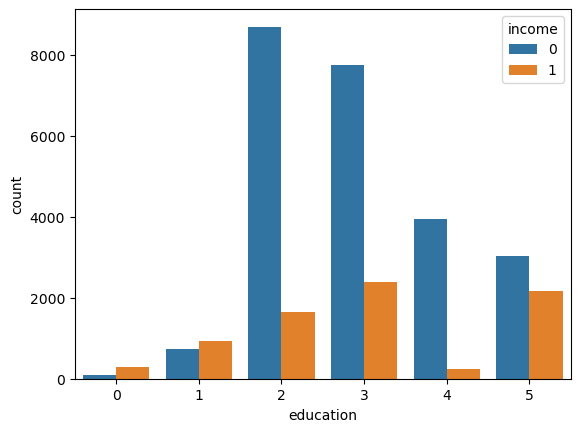

In [74]:
sns.countplot(x="education",data=Inc,hue='income')

From the above plot we can see the people who are HS Grad,some college & bachelors are more in numbers which having income less than 50k

<Axes: xlabel='workclass', ylabel='count'>

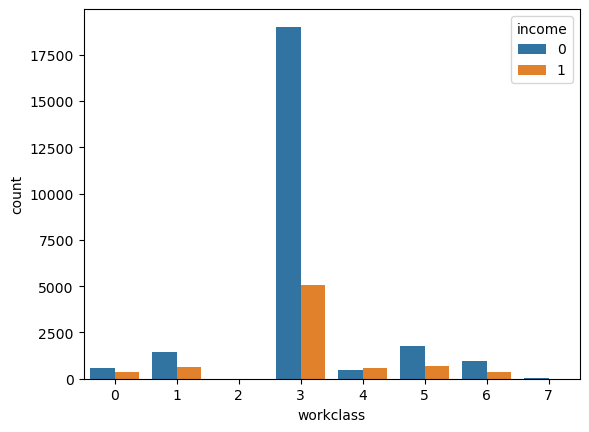

In [75]:
sns.countplot(x="workclass",data=Inc,hue='income')

from this plot we can clearly see private employees are more in numbers among all having income less than 50k per month

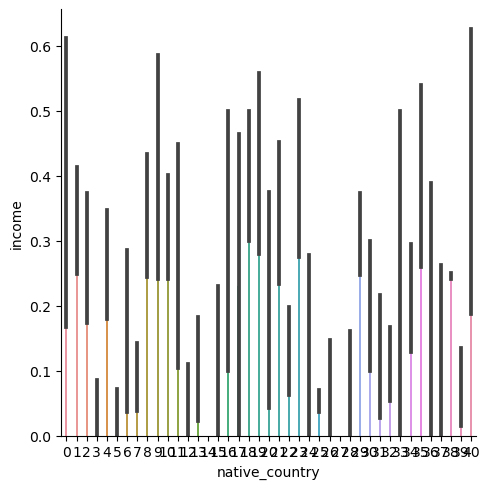

In [76]:

sns.catplot(x="native_country",y="income",kind="bar",data=Inc,width=0.2)


From this plot we can clearly see Country Combodia & Yugoslavia people have higher income than other country people.

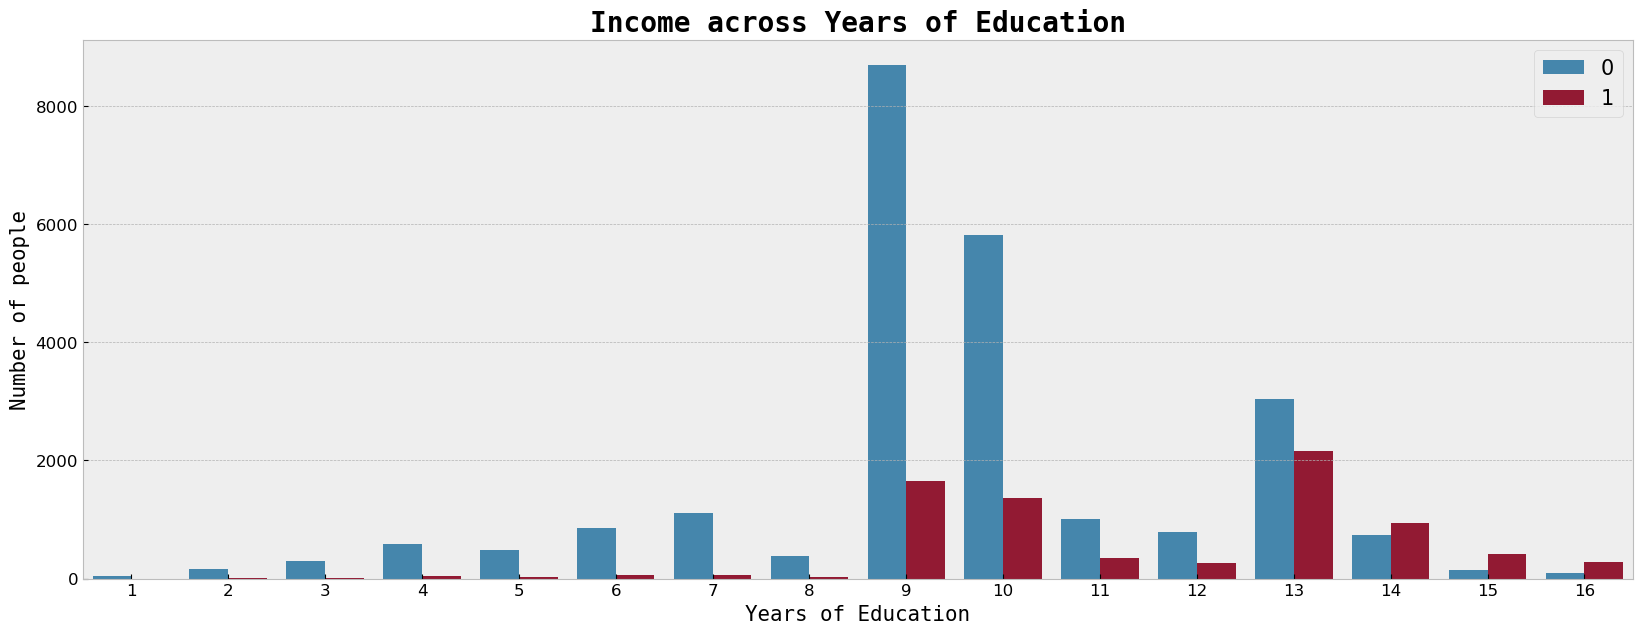

In [77]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(data=Inc, x='education.num', hue='income')
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()


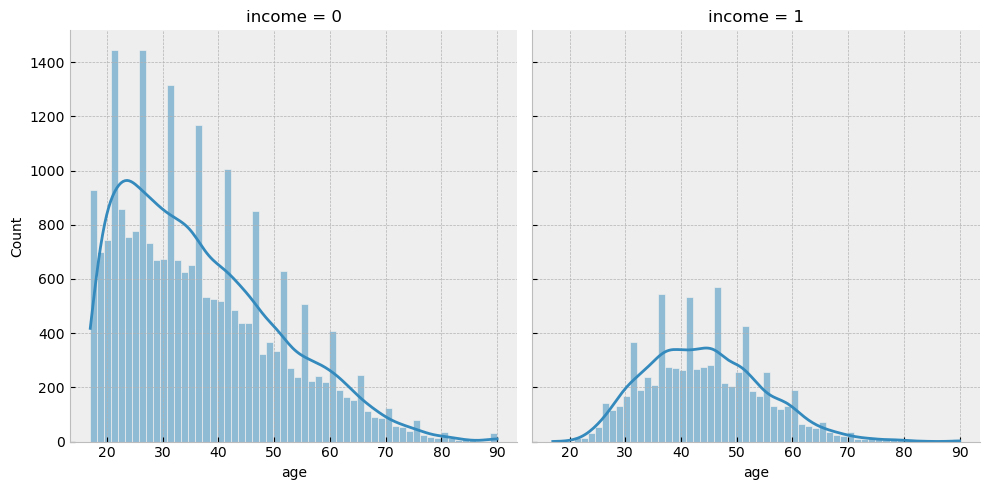

In [78]:
sns.displot(data=Inc,x="age",col="income",kde=True)

From this plot we can clearly see younger people have higher income than older ones in case of less than 50k$ a year & for greater than 50k$ a year we can see a more people in age 30-50.

<Axes: xlabel='age', ylabel='Count'>

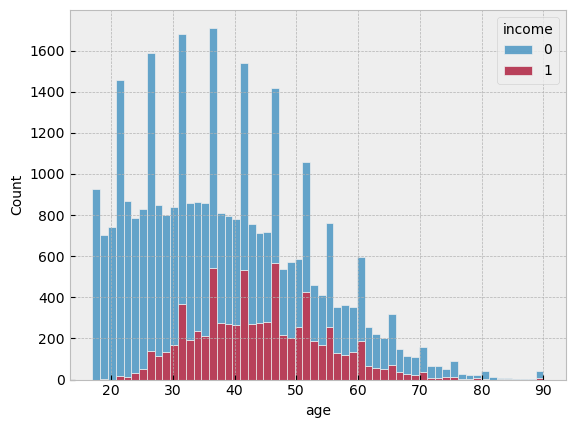

In [79]:
sns.histplot(data=Inc,x="age",hue="income",multiple="stack")

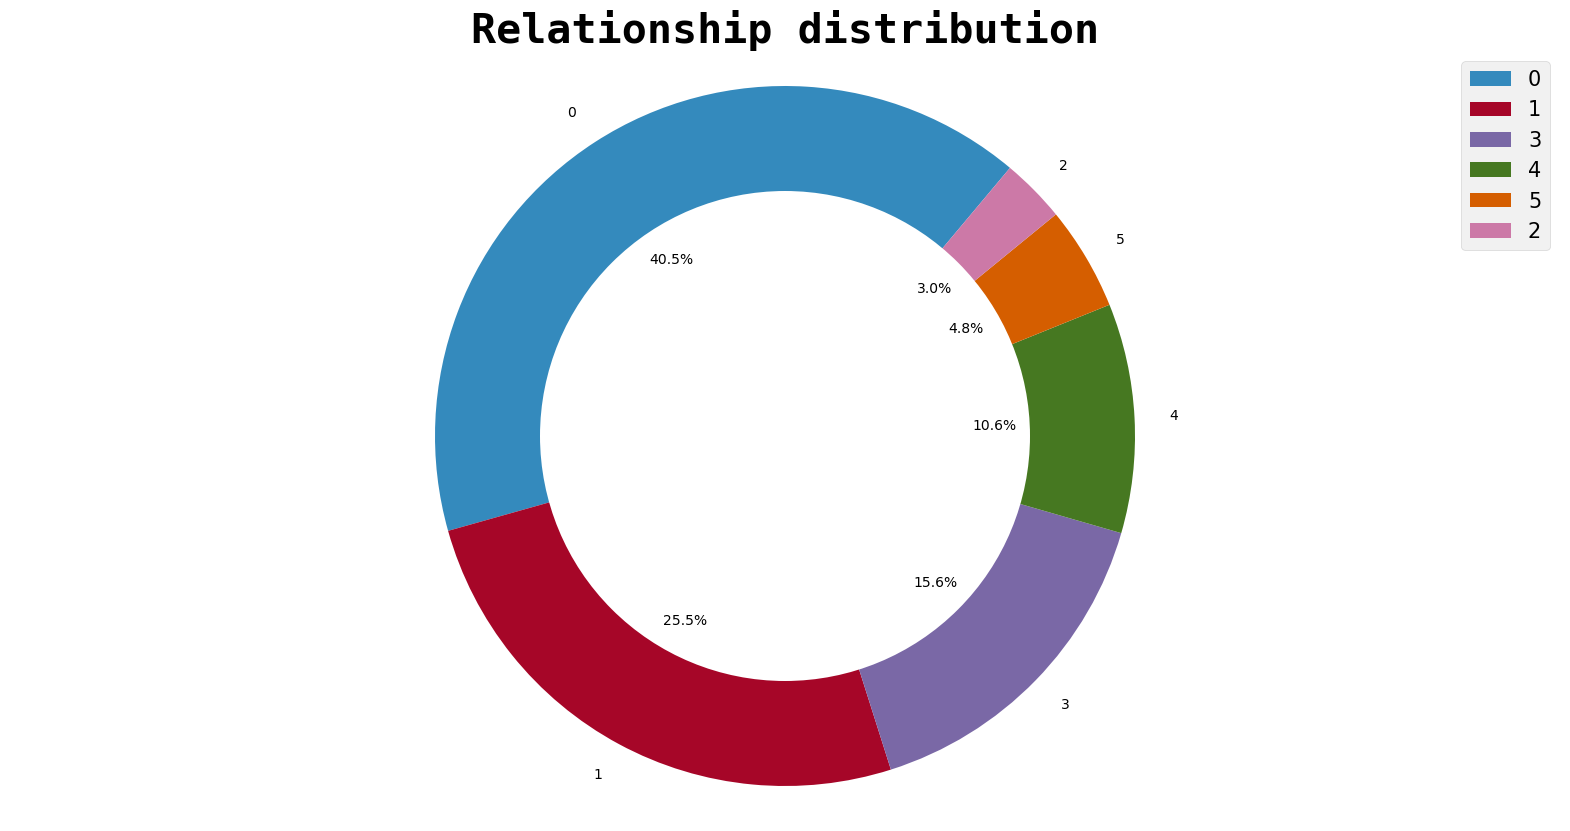

In [80]:
# Creating a donut chart for 'Age'
relation = Inc['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

Here from this plot we can clearly conclude husband is higher in numbers & No of people which are not in family is 2nd highest.

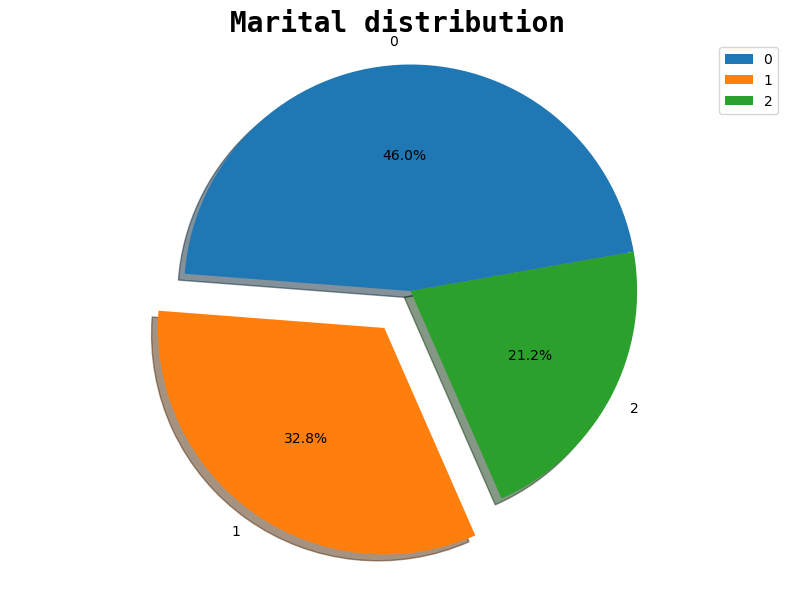

In [81]:
# Creating a pie chart for 'Marital status'
marital = Inc['marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.show()

From this plot we can see the no of people who never married & married have civ-spouse have income count high as compare to other & more no of people have <=50k monthly income 

# CLASS IMBALANCE ISSUE

In [82]:
Inc.income.value_counts()

0    24264
1     7683
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='count'>

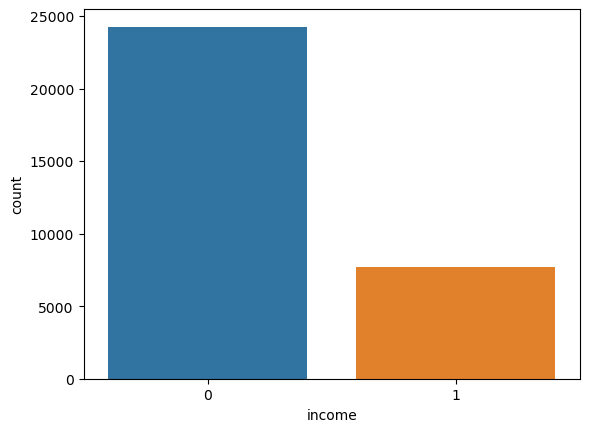

In [83]:
sns.countplot(x="income",data=Inc)

We can easily see from here model is biased & Count of people have income <=50k$ per year is more.

# Undersampling technique(Nearmiss)

In [84]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

In [85]:
x_nm,y_nm=nm.fit_resample(data_x,data_y)

In [86]:
x_nm.shape,y_nm.shape

((15366, 11), (15366,))

In [87]:
y_nm.value_counts()

0    7683
1    7683
Name: income, dtype: int64

In [88]:
xnm_tr,xnm_te,ynm_tr,ynm_te=train_test_split(x_nm,y_nm,test_size=0.2,random_state=100)

In [89]:
xnm_tr.shape,xnm_te.shape,ynm_tr.shape,ynm_te.shape

((12292, 11), (3074, 11), (12292,), (3074,))

# Undersampling technique(IMBlearn)

In [90]:
from imblearn.under_sampling import RandomUnderSampler

In [91]:
a1=RandomUnderSampler(sampling_strategy='all')

In [92]:
x2,y2=a1.fit_resample(data_x,data_y)

In [93]:
x2.shape,y2.shape

((15366, 11), (15366,))

In [94]:
xtr,xte,ytr,yte=train_test_split(x2,y2,test_size=0.2,random_state=100)

In [95]:
xtr.shape,xte.shape,ytr.shape,yte.shape

((12292, 11), (3074, 11), (12292,), (3074,))

# Oversampling technique(SMOTE)

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
smote=SMOTE()

In [98]:
x_smote,y_smote=smote.fit_resample(data_x,data_y)

In [99]:
x_smote.shape,y_smote.shape

((48528, 11), (48528,))

In [100]:
y_smote.value_counts()

0    24264
1    24264
Name: income, dtype: int64

In [101]:
xs_tr,xs_te,ys_tr,ys_te=train_test_split(x_smote,y_smote,test_size=0.2,random_state=100)

In [102]:
xs_tr.shape,xs_te.shape,ys_tr.shape,ys_te.shape

((38822, 11), (9706, 11), (38822,), (9706,))

# Check Correlation b/w columns

In [103]:
import  seaborn as sns
data_cor=Inc.corr()
data_cor

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,native_country,income
age,1.000000,0.040187,-0.076178,-0.058903,0.035951,-0.080518,0.021292,-0.263814,0.026348,0.088590,-0.001080,0.233361
workclass,0.040187,1.000000,-0.024599,-0.017771,0.003008,-0.056610,0.008038,-0.058504,0.050114,0.071255,-0.001845,0.001765
fnlwgt,-0.076178,-0.024599,1.000000,0.015618,-0.044539,0.012013,-0.006410,0.009992,-0.021793,0.025680,-0.063446,-0.008796
education,-0.058903,-0.017771,0.015618,1.000000,0.030227,-0.012237,0.031179,-0.003645,-0.003171,0.003886,-0.034799,0.014452
education.num,0.035951,0.003008,-0.044539,0.030227,1.000000,-0.089945,0.092225,-0.093851,0.034672,0.010850,0.088980,0.335477
marital_status,-0.080518,-0.056610,0.012013,-0.012237,-0.089945,1.000000,-0.054362,0.469359,-0.082772,-0.448681,0.000273,-0.376732
occupation,0.021292,0.008038,-0.006410,0.031179,0.092225,-0.054362,1.000000,-0.057766,0.006589,0.062344,0.002678,0.086637
relationship,-0.263814,-0.058504,0.009992,-0.003645,-0.093851,0.469359,-0.057766,1.000000,-0.117755,-0.581325,-0.010496,-0.250853
race,0.026348,0.050114,-0.021793,-0.003171,0.034672,-0.082772,0.006589,-0.117755,1.000000,0.090029,0.121212,0.072364
sex,0.088590,0.071255,0.025680,0.003886,0.010850,-0.448681,0.062344,-0.581325,0.090029,1.000000,0.001399,0.216024


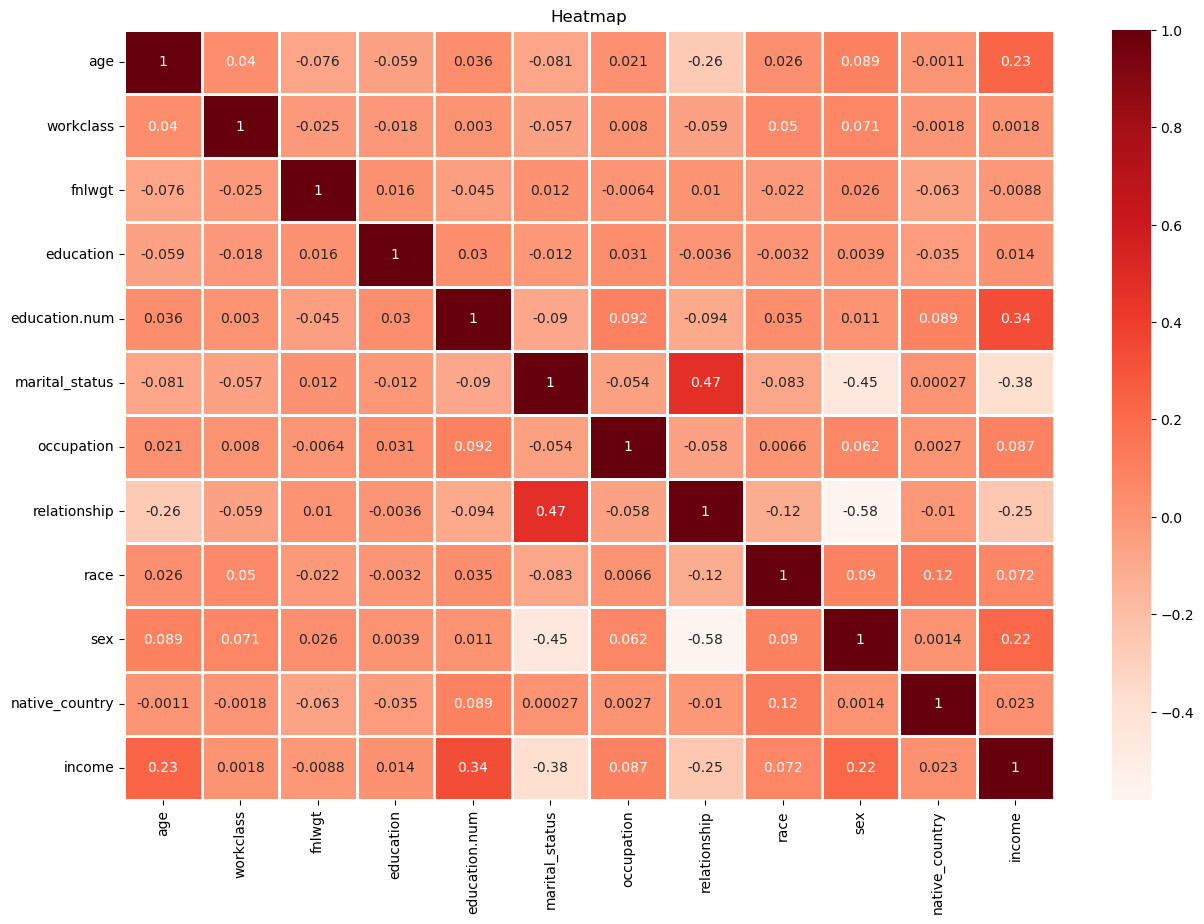

In [104]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(data_cor,linewidth=1,annot=True,cmap=plt.cm.Reds)
plt.title("Heatmap")
plt.show()

From the correlation heatmap, we can see that the dependent feature ‘income’ is highly correlated with age, numbers of years of education,marital_status,sex.

# Outliers Treatment

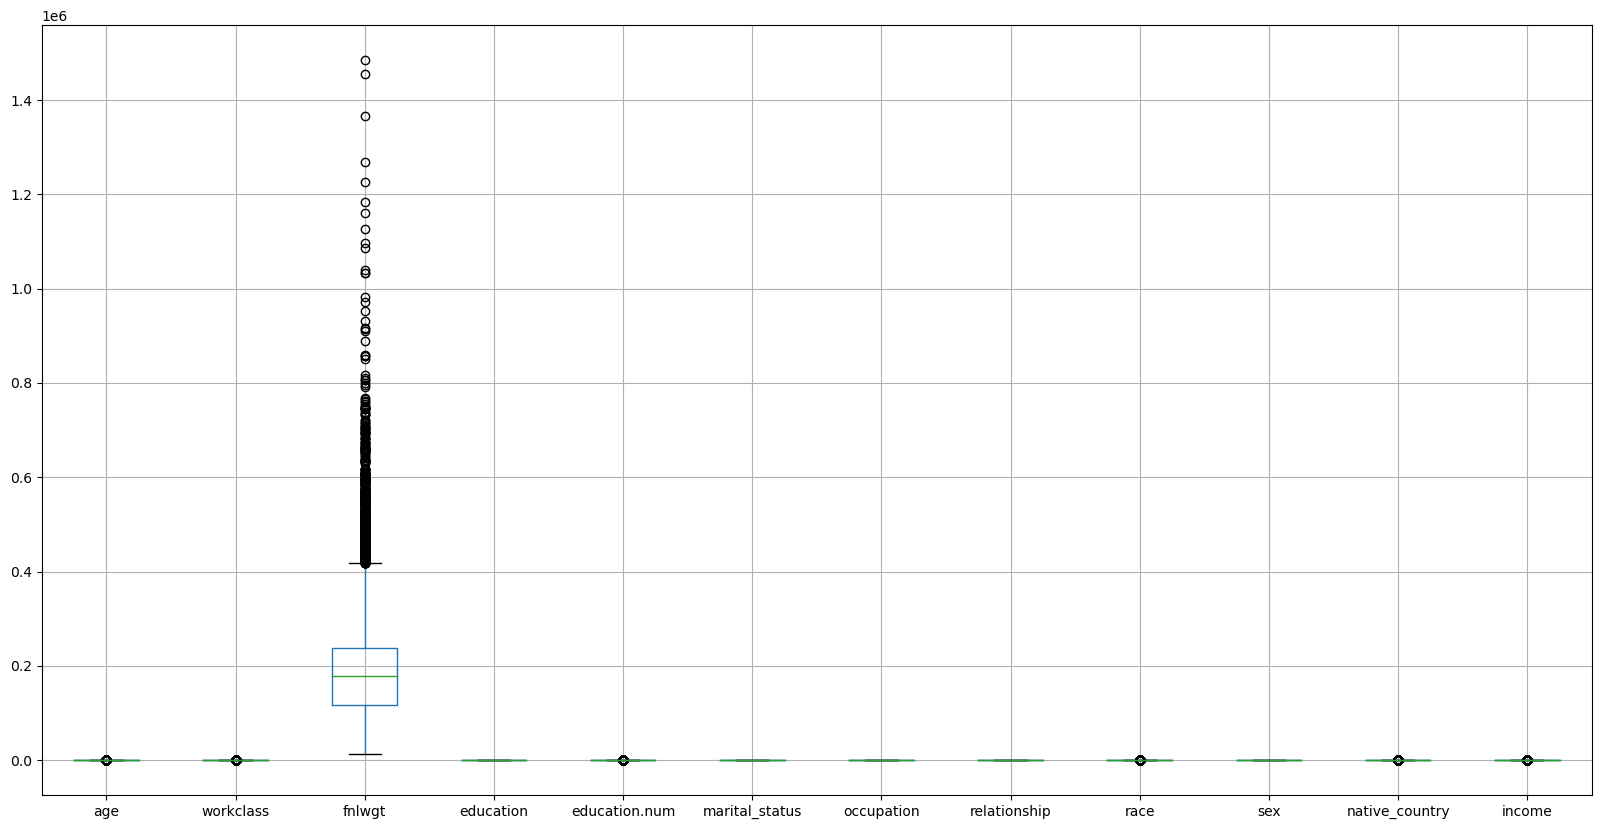

In [105]:
Inc.boxplot(figsize=(20,10))
plt.show()

<Axes: >

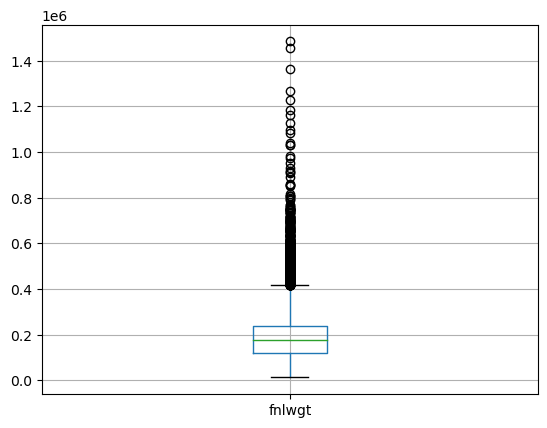

In [106]:
Inc.boxplot(column="fnlwgt")

<Axes: xlabel='fnlwgt', ylabel='Density'>

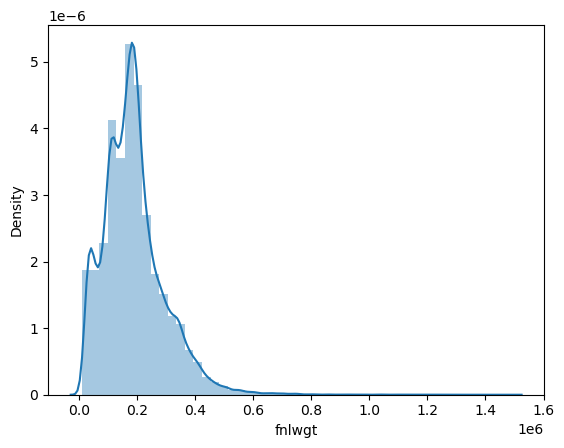

In [107]:
sns.distplot(Inc.fnlwgt)

In [108]:
Inc["fnlwgt"].describe()

count    3.194700e+04
mean     1.897319e+05
std      1.057567e+05
min      1.228500e+04
25%      1.176275e+05
50%      1.783120e+05
75%      2.374535e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [109]:
IQR=Inc.fnlwgt.quantile(0.75)-Inc.fnlwgt.quantile(0.25)
IQR

119826.0

In [110]:
ilb1=Inc["fnlwgt"].quantile(0.25)-(IQR*3)     # for extreme boundary instead of 1.5 we can take 3
iub1=Inc["fnlwgt"].quantile(0.75)+(IQR*3)
ilb1,iub1

(-241850.5, 596931.5)

In [111]:
Inc.loc[Inc["fnlwgt"]>596931.5,"fnlwgt"]=596931.5
Inc.loc[Inc["fnlwgt"]<-241850.5,"fnlwgt"]=-241850.5

In [112]:
Inc["fnlwgt"].describe()

count     31947.000000
mean     189075.136805
std      102080.907039
min       12285.000000
25%      117627.500000
50%      178312.000000
75%      237453.500000
max      596931.500000
Name: fnlwgt, dtype: float64

<Axes: xlabel='fnlwgt', ylabel='Density'>

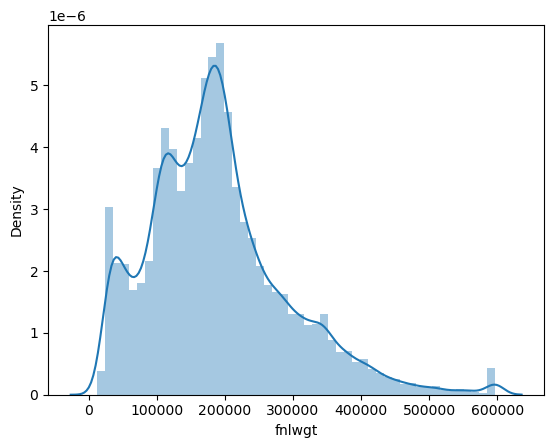

In [113]:
sns.distplot(Inc.fnlwgt)

<Axes: xlabel='fnlwgt', ylabel='Count'>

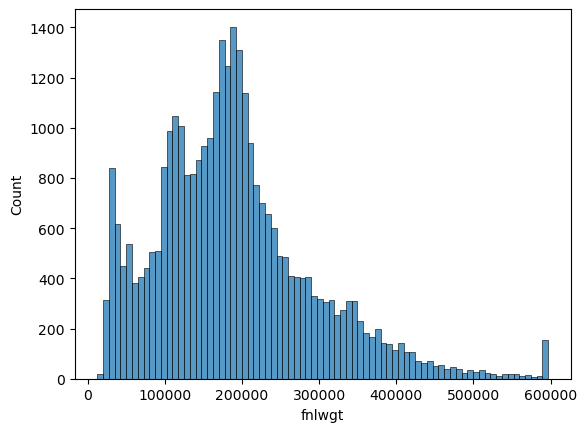

In [114]:
sns.histplot(Inc.fnlwgt)

# Check Skewness

In [115]:
Inc.skew()

age               0.557149
workclass         0.078403
fnlwgt            0.946188
education         0.235686
education.num    -0.308481
marital_status    0.464413
occupation        0.043696
relationship      0.784843
race             -2.484849
sex              -0.714774
native_country   -4.199998
income            1.214464
dtype: float64

# Skewness treatment

As only categorical column has skewness so we do not do any process on treatment

# Ml Models after EDA,Feature engineering on Oversampled data

#Logistic Regression

In [116]:
lg.fit(xs_tr,ys_tr)

LogisticRegression()

In [117]:
p2=lg.predict(xs_te)

In [118]:
prob1=lg.predict_proba(xs_te)
prob1

array([[0.19739354, 0.80260646],
       [0.35961061, 0.64038939],
       [0.33456618, 0.66543382],
       ...,
       [0.18434194, 0.81565806],
       [0.40694542, 0.59305458],
       [0.34999293, 0.65000707]])

In [119]:
m2=confusion_matrix(p2,ys_te)
m2

array([[3497, 1203],
       [1342, 3664]], dtype=int64)

In [120]:
lr_ac2=m2.diagonal().sum()/m2.sum()*100
lr_ac2

73.7791057078096

In [121]:
print(classification_report(p2,ys_te))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      4700
           1       0.75      0.73      0.74      5006

    accuracy                           0.74      9706
   macro avg       0.74      0.74      0.74      9706
weighted avg       0.74      0.74      0.74      9706



In [122]:
from sklearn.metrics import precision_score,recall_score,f1_score

lr_pre3 = precision_score(ys_te,p2)
print('Precision: %f' % lr_pre3)
# recall: tp / (tp + fn)
lr_rec3 = recall_score(ys_te, p2)
print('Recall: %f' % lr_rec3)
# f1: 2 tp / (2 tp + fp + fn)
lr_f123 = f1_score(ys_te, p2)
print('F1 score: %f' % lr_f123)

Precision: 0.731922
Recall: 0.752825
F1 score: 0.742226


#Decision Tree

In [123]:
dt.fit(xs_tr,ys_tr)

DecisionTreeClassifier()

In [124]:
dt_p=dt.predict(xs_te)
dt_p

array([1, 1, 0, ..., 0, 1, 0])

In [125]:
dt_cf=confusion_matrix(dt_p,ys_te)
dt_cf

array([[3939,  877],
       [ 900, 3990]], dtype=int64)

In [126]:
dt_acc2=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc2

81.6917370698537

In [127]:
print(classification_report(dt_p,ys_te))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      4816
           1       0.82      0.82      0.82      4890

    accuracy                           0.82      9706
   macro avg       0.82      0.82      0.82      9706
weighted avg       0.82      0.82      0.82      9706



In [128]:
from sklearn.metrics import precision_score,recall_score,f1_score

dt_pre3 = precision_score(ys_te,dt_p)
print('Precision: %f' % dt_pre3)
# recall: tp / (tp + fn)
dt_rec3 = recall_score(ys_te, dt_p)
print('Recall: %f' % dt_rec3)
# f1: 2 tp / (2 tp + fp + fn)
dt_f123 = f1_score(ys_te, dt_p)
print('F1 score: %f' % dt_f123)

Precision: 0.815951
Recall: 0.819807
F1 score: 0.817874


#random forest

In [129]:
rf.fit(xs_tr,ys_tr)

RandomForestClassifier()

In [130]:
rf_p=rf.predict(xs_te)
rf_p

array([1, 1, 1, ..., 0, 1, 0])

In [131]:
rf_cf=confusion_matrix(rf_p,ys_te)
rf_cf

array([[4129,  640],
       [ 710, 4227]], dtype=int64)

In [132]:
rf_acc2=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc2

86.09107768390686

In [133]:
print(classification_report(rf_p,ys_te))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4769
           1       0.87      0.86      0.86      4937

    accuracy                           0.86      9706
   macro avg       0.86      0.86      0.86      9706
weighted avg       0.86      0.86      0.86      9706



In [134]:
from sklearn.metrics import precision_score,recall_score,f1_score

rf_pre3 = precision_score(ys_te,rf_p)
print('Precision: %f' % rf_pre3)
# recall: tp / (tp + fn)
rf_rec3 = recall_score(ys_te, rf_p)
print('Recall: %f' % rf_rec3)
# f1: 2 tp / (2 tp + fp + fn)
rf_f123 = f1_score(ys_te, rf_p)
print('F1 score: %f' % rf_f123)

Precision: 0.856188
Recall: 0.868502
F1 score: 0.862301


#XG Boost

In [135]:
xgb.fit(xs_tr,ys_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [136]:
xgb_p=xgb.predict(xs_te)

In [137]:
xgb_m=confusion_matrix(xgb_p,ys_te)
xgb_m

array([[4140,  587],
       [ 699, 4280]], dtype=int64)

In [138]:
xgb_ac2=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac2

86.75046363074387

In [139]:
print(classification_report(xgb_p,ys_te))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4727
           1       0.88      0.86      0.87      4979

    accuracy                           0.87      9706
   macro avg       0.87      0.87      0.87      9706
weighted avg       0.87      0.87      0.87      9706



In [140]:
from sklearn.metrics import precision_score,recall_score,f1_score

xgb_pre3 = precision_score(ys_te,xgb_p)
print('Precision: %f' % xgb_pre3)
# recall: tp / (tp + fn)
xgb_rec3 = recall_score(ys_te, xgb_p)
print('Recall: %f' % xgb_rec3)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f123 = f1_score(ys_te, xgb_p)
print('F1 score: %f' % xgb_f123)

Precision: 0.859610
Recall: 0.879392
F1 score: 0.869389


In [141]:
df1=pd.DataFrame(xgb_p)
df1

,0
0,1
1,1
2,1
3,1
4,1
...,...
9701,1
9702,0
9703,0
9704,1


In [142]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [143]:
roc=roc_auc_score(ys_te,df1)
roc

0.8674702447789439

In [144]:
fpr,tpr,threshold=roc_curve(ys_te,df1)

Text(0.5, 1.0, 'Aucroc-Curve')

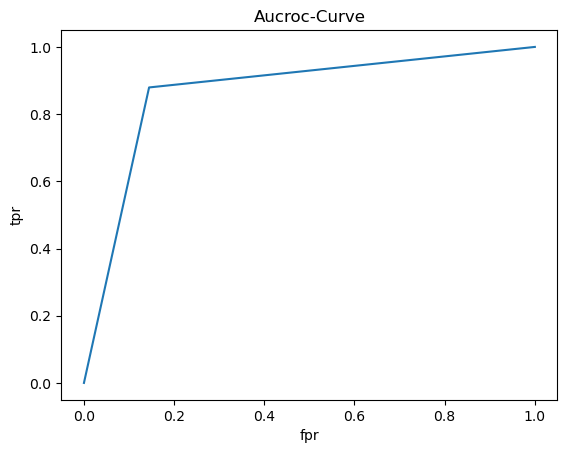

In [145]:
plt.plot(fpr,tpr,label="Auc-roc Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Aucroc-Curve")

# ML MODEL ON UNDERSAMPLING DATA(nearmiss)

#Logistic Regression

In [146]:
lg.fit(xnm_tr,ynm_tr)

LogisticRegression()

In [147]:
p2=lg.predict(xnm_te)

In [148]:
prob1=lg.predict_proba(xnm_te)
prob1

array([[0.48160875, 0.51839125],
       [0.46181303, 0.53818697],
       [0.4434994 , 0.5565006 ],
       ...,
       [0.46942197, 0.53057803],
       [0.48130874, 0.51869126],
       [0.47149199, 0.52850801]])

In [149]:
m2=confusion_matrix(p2,ynm_te)
m2

array([[   0,    0],
       [1541, 1533]], dtype=int64)

In [150]:
lr_ac1=m2.diagonal().sum()/m2.sum()*100
lr_ac1

49.86987638256343

In [151]:
print(classification_report(p2,ynm_te))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67      3074

    accuracy                           0.50      3074
   macro avg       0.50      0.25      0.33      3074
weighted avg       1.00      0.50      0.67      3074



In [152]:
from sklearn.metrics import precision_score,recall_score,f1_score

lr_pre2 = precision_score(ynm_te,p2)
print('Precision: %f' % lr_pre2)
# recall: tp / (tp + fn)
lr_rec2 = recall_score(ynm_te, p2)
print('Recall: %f' % lr_rec2)
# f1: 2 tp / (2 tp + fp + fn)
lr_f12 = f1_score(ynm_te, p2)
print('F1 score: %f' % lr_f12)

Precision: 0.498699
Recall: 1.000000
F1 score: 0.665509


#Decision Tree

In [153]:
dt.fit(xnm_tr,ynm_tr)

DecisionTreeClassifier()

In [154]:
dt_p=dt.predict(xnm_te)
dt_p

array([1, 0, 1, ..., 1, 1, 1])

In [155]:
dt_cf=confusion_matrix(dt_p,ynm_te)
dt_cf

array([[1120,  446],
       [ 421, 1087]], dtype=int64)

In [156]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

71.7957059206246

In [157]:
print(classification_report(dt_p,ynm_te))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1566
           1       0.71      0.72      0.71      1508

    accuracy                           0.72      3074
   macro avg       0.72      0.72      0.72      3074
weighted avg       0.72      0.72      0.72      3074



In [158]:
from sklearn.metrics import precision_score,recall_score,f1_score

dt_pre2 = precision_score(ynm_te,dt_p)
print('Precision: %f' % dt_pre2)
# recall: tp / (tp + fn)
dt_rec2 = recall_score(ynm_te, dt_p)
print('Recall: %f' % dt_rec2)
# f1: 2 tp / (2 tp + fp + fn)
dt_f12 = f1_score(ynm_te, dt_p)
print('F1 score: %f' % dt_f12)

Precision: 0.720822
Recall: 0.709067
F1 score: 0.714896


#Random forest

In [159]:
rf.fit(xnm_tr,ynm_tr)

RandomForestClassifier()

In [160]:
rf_p=rf.predict(xnm_te)
rf_p

array([1, 0, 1, ..., 1, 1, 0])

In [161]:
rf_cf=confusion_matrix(rf_p,ynm_te)
rf_cf

array([[1198,  358],
       [ 343, 1175]], dtype=int64)

In [162]:
rf_acc1=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc1

77.19583604424203

In [163]:
print(classification_report(rf_p,ynm_te))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1556
           1       0.77      0.77      0.77      1518

    accuracy                           0.77      3074
   macro avg       0.77      0.77      0.77      3074
weighted avg       0.77      0.77      0.77      3074



In [164]:
from sklearn.metrics import precision_score,recall_score,f1_score

rf_pre2 = precision_score(ynm_te,rf_p)
print('Precision: %f' % rf_pre2)
# recall: tp / (tp + fn)
rf_rec2 = recall_score(ynm_te, rf_p)
print('Recall: %f' % rf_rec2)
# f1: 2 tp / (2 tp + fp + fn)
rf_f12 = f1_score(ynm_te, rf_p)
print('F1 score: %f' % rf_f12)

Precision: 0.774045
Recall: 0.766471
F1 score: 0.770239


#Xg boost

In [165]:
xgb.fit(xnm_tr,ynm_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [166]:
xgb_p=xgb.predict(xnm_te)

In [167]:
xgb_m=confusion_matrix(xgb_p,ynm_te)
xgb_m

array([[1202,  290],
       [ 339, 1243]], dtype=int64)

In [168]:
xgb_ac1=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac1

79.53806115810019

In [169]:
print(classification_report(xgb_p,ynm_te))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1492
           1       0.81      0.79      0.80      1582

    accuracy                           0.80      3074
   macro avg       0.80      0.80      0.80      3074
weighted avg       0.80      0.80      0.80      3074



In [170]:
from sklearn.metrics import precision_score,recall_score,f1_score

xgb_pre2 = precision_score(ynm_te,xgb_p)
print('Precision: %f' % xgb_pre2)
# recall: tp / (tp + fn)
xgb_rec2 = recall_score(ynm_te, xgb_p)
print('Recall: %f' % xgb_rec2)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f12 = f1_score(ynm_te, xgb_p)
print('F1 score: %f' % xgb_f12)

Precision: 0.785714
Recall: 0.810828
F1 score: 0.798074


# Feature selection(RFE)

In [171]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [172]:
rfe=RFE(dtree)

In [173]:
rfe.fit(xs_tr,ys_tr)

RFE(estimator=DecisionTreeClassifier())

In [174]:
rfe.support_

array([ True, False,  True, False,  True,  True, False,  True, False,
       False, False])

In [175]:
new_x = x_smote.drop(columns=['sex', 'race', 'native_country','occupation','relationship','workclass']) 
new_x.head()

,age,fnlwgt,education,education.num,marital_status
0,17,148522,4,7,1
1,17,93235,4,8,1
2,17,184924,4,5,1
3,17,116626,4,7,1
4,17,209949,4,7,1


# ML Models after feature selection(RFE)

In [176]:
d_x_train,d_x_test,d_y_train,d_y_test=train_test_split(new_x,y_smote,test_size=0.2,random_state=101)

In [177]:
lg.fit(d_x_train,d_y_train)

LogisticRegression()

In [178]:
p1=lg.predict(d_x_test)

In [179]:
prob=lg.predict_proba(d_x_test)
prob

array([[0.50158287, 0.49841713],
       [0.50133825, 0.49866175],
       [0.50241277, 0.49758723],
       ...,
       [0.500579  , 0.499421  ],
       [0.50087006, 0.49912994],
       [0.50381514, 0.49618486]])

In [180]:
from sklearn.metrics import confusion_matrix

In [181]:
m1=confusion_matrix(p1,d_y_test)
m1

array([[4902, 4804],
       [   0,    0]], dtype=int64)

In [182]:
lr_ac7=m1.diagonal().sum()/m1.sum()*100
lr_ac7

50.504842365547084

In [183]:
from sklearn.metrics import classification_report
print(classification_report(p1,d_y_test))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      9706
           1       0.00      0.00      0.00         0

    accuracy                           0.51      9706
   macro avg       0.50      0.25      0.34      9706
weighted avg       1.00      0.51      0.67      9706



In [184]:
from sklearn.metrics import precision_score,recall_score,f1_score

lr_pre1 = precision_score(d_y_test,p1)
print('Precision: %f' % lr_pre1)
# recall: tp / (tp + fn)
lr_rec1 = recall_score(d_y_test, p1)
print('Recall: %f' % lr_rec1)
# f1: 2 tp / (2 tp + fp + fn)
lr_f11 = f1_score(d_y_test, p1)
print('F1 score: %f' % lr_f11)

Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


#Decision tree

In [185]:
dt.fit(d_x_train,d_y_train)

DecisionTreeClassifier()

In [186]:
dt_p=dt.predict(d_x_test)
dt_p

array([1, 0, 0, ..., 0, 1, 0])

In [187]:
dt_cf=confusion_matrix(dt_p,d_y_test)
dt_cf

array([[3941,  864],
       [ 961, 3940]], dtype=int64)

In [188]:
dt_acc7=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc7

81.19719760972595

In [189]:
print(classification_report(dt_p,d_y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4805
           1       0.82      0.80      0.81      4901

    accuracy                           0.81      9706
   macro avg       0.81      0.81      0.81      9706
weighted avg       0.81      0.81      0.81      9706



In [190]:
from sklearn.metrics import precision_score,recall_score,f1_score

dt_pre1 = precision_score(d_y_test,dt_p)
print('Precision: %f' % dt_pre1)
# recall: tp / (tp + fn)
dt_rec1 = recall_score(d_y_test, dt_p)
print('Recall: %f' % dt_rec1)
# f1: 2 tp / (2 tp + fp + fn)
dt_f11 = f1_score(d_y_test, dt_p)
print('F1 score: %f' % dt_f11)

Precision: 0.803918
Recall: 0.820150
F1 score: 0.811953


In [191]:
#Random forest

In [192]:
rf.fit(d_x_train,d_y_train)

RandomForestClassifier()

In [193]:
rf_p=rf.predict(d_x_test)
rf_p

array([1, 0, 0, ..., 0, 1, 0])

In [194]:
rf_cf=confusion_matrix(rf_p,d_y_test)
rf_cf

array([[3969,  804],
       [ 933, 4000]], dtype=int64)

In [195]:
rf_acc4=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc4

82.10385328662683

In [196]:
print(classification_report(rf_p,d_y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4773
           1       0.83      0.81      0.82      4933

    accuracy                           0.82      9706
   macro avg       0.82      0.82      0.82      9706
weighted avg       0.82      0.82      0.82      9706



In [197]:
from sklearn.metrics import precision_score,recall_score,f1_score

rf_pre1 = precision_score(d_y_test,rf_p)
print('Precision: %f' % rf_pre1)
# recall: tp / (tp + fn)
rf_rec1 = recall_score(d_y_test, rf_p)
print('Recall: %f' % rf_rec1)
# f1: 2 tp / (2 tp + fp + fn)
rf_f11 = f1_score(d_y_test, rf_p)
print('F1 score: %f' % rf_f11)

Precision: 0.810866
Recall: 0.832639
F1 score: 0.821608


# Xg boost

In [198]:
xgb.fit(d_x_train,d_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [199]:
xgb_p=xgb.predict(d_x_test)

In [200]:
xgb_m=confusion_matrix(xgb_p,d_y_test)
xgb_m

array([[3936,  526],
       [ 966, 4278]], dtype=int64)

In [201]:
xgb_ac4=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac4

84.62806511436224

In [202]:
print(classification_report(xgb_p,d_y_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      4462
           1       0.89      0.82      0.85      5244

    accuracy                           0.85      9706
   macro avg       0.85      0.85      0.85      9706
weighted avg       0.85      0.85      0.85      9706



In [203]:
from sklearn.metrics import precision_score,recall_score,f1_score

xgb_pre1 = precision_score(d_y_test,xgb_p)
print('Precision: %f' % xgb_pre1)
# recall: tp / (tp + fn)
xgb_rec1 = recall_score(d_y_test, xgb_p)
print('Recall: %f' % xgb_rec1)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f11 = f1_score(d_y_test, xgb_p)
print('F1 score: %f' % xgb_f11)

Precision: 0.815789
Recall: 0.890508
F1 score: 0.851513


# Feature Selection(Chi square test)

In [204]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [205]:
cst=SelectKBest(score_func=chi2,k="all")

In [206]:
Inc.iloc[:,0:-1].head(2)

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,native_country
0,17,3,148522.0,4,7,1,14,3,4,1,38
1,17,3,93235.0,4,8,1,14,3,4,0,38


In [207]:
cst_fit=cst.fit(Inc.iloc[:,0:-1],Inc.iloc[:,-1])

In [208]:
cst_score=cst_fit.scores_
cst_score

array([8.39934546e+03, 3.95665629e-02, 1.23520865e+05, 3.17951772e+00,
       2.34222548e+03, 3.68170826e+03, 6.57444206e+02, 3.58453190e+03,
       3.21138180e+01, 4.94570375e+02, 1.70966387e+01])

In [209]:
cdf=pd.DataFrame(cst_score)

In [210]:
cdf2=pd.DataFrame({"features":list(cst_score),"columns":list(x_smote)})

In [211]:
cdf2

,features,columns
0,8399.345457,age
1,0.039567,workclass
2,123520.864653,fnlwgt
3,3.179518,education
4,2342.225479,education.num
5,3681.708258,marital_status
6,657.444206,occupation
7,3584.531896,relationship
8,32.113818,race
9,494.570375,sex


In [212]:
new_x = x_smote.drop(columns=[ 'race', 'native_country','workclass']) 
new_x.head()

,age,fnlwgt,education,education.num,marital_status,occupation,relationship,sex
0,17,148522,4,7,1,14,3,1
1,17,93235,4,8,1,14,3,0
2,17,184924,4,5,1,14,3,1
3,17,116626,4,7,1,14,3,1
4,17,209949,4,7,1,14,3,0


In [213]:
d_x_train,d_x_test,d_y_train,d_y_test=train_test_split(new_x,y_smote,test_size=0.2,random_state=101)

#logistic regression

In [214]:
lg.fit(d_x_train,d_y_train)

LogisticRegression()

In [215]:
p1=lg.predict(d_x_test)

In [216]:
prob=lg.predict_proba(d_x_test)
prob

array([[0.50158287, 0.49841713],
       [0.50133825, 0.49866175],
       [0.50241277, 0.49758723],
       ...,
       [0.500579  , 0.499421  ],
       [0.50087006, 0.49912994],
       [0.50381515, 0.49618485]])

In [217]:
from sklearn.metrics import confusion_matrix
m1=confusion_matrix(p1,d_y_test)
m1

array([[4902, 4804],
       [   0,    0]], dtype=int64)

In [218]:
lr_ac8=m1.diagonal().sum()/m1.sum()*100
lr_ac8

50.504842365547084

In [219]:
from sklearn.metrics import classification_report
print(classification_report(p1,d_y_test))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      9706
           1       0.00      0.00      0.00         0

    accuracy                           0.51      9706
   macro avg       0.50      0.25      0.34      9706
weighted avg       1.00      0.51      0.67      9706



In [220]:
from sklearn.metrics import precision_score,recall_score,f1_score

lr_pre = precision_score(d_y_test,p1)
print('Precision: %f' % lr_pre)
# recall: tp / (tp + fn)
lr_rec = recall_score(d_y_test, p1)
print('Recall: %f' % lr_rec)
# f1: 2 tp / (2 tp + fp + fn)
lr_f1 = f1_score(d_y_test, p1)
print('F1 score: %f' % lr_f1)

Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


#decision tree

In [221]:
dt.fit(d_x_train,d_y_train)

DecisionTreeClassifier()

In [222]:
dt_p=dt.predict(d_x_test)
dt_p

array([1, 0, 0, ..., 1, 1, 0])

In [223]:
dt_cf=confusion_matrix(dt_p,d_y_test)
dt_cf

array([[3952,  894],
       [ 950, 3910]], dtype=int64)

In [224]:
dt_acc8=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc8

81.00144240675871

In [225]:
print(classification_report(dt_p,d_y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      4846
           1       0.81      0.80      0.81      4860

    accuracy                           0.81      9706
   macro avg       0.81      0.81      0.81      9706
weighted avg       0.81      0.81      0.81      9706



In [226]:
from sklearn.metrics import precision_score,recall_score,f1_score

dt_pre = precision_score(d_y_test,dt_p)
print('Precision: %f' % dt_pre)
# recall: tp / (tp + fn)
dt_rec = recall_score(d_y_test, dt_p)
print('Recall: %f' % dt_rec)
# f1: 2 tp / (2 tp + fp + fn)
dt_f1 = f1_score(d_y_test, dt_p)
print('F1 score: %f' % dt_f1)

Precision: 0.804527
Recall: 0.813905
F1 score: 0.809189


In [227]:
#random forest

In [228]:
rf.fit(d_x_train,d_y_train)

RandomForestClassifier()

In [229]:
rf_p=rf.predict(d_x_test)
rf_p

array([1, 0, 0, ..., 0, 1, 0])

In [230]:
rf_cf=confusion_matrix(rf_p,d_y_test)
rf_cf

array([[4092,  710],
       [ 810, 4094]], dtype=int64)

In [231]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

84.33958376262106

In [232]:
print(classification_report(rf_p,d_y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4802
           1       0.85      0.83      0.84      4904

    accuracy                           0.84      9706
   macro avg       0.84      0.84      0.84      9706
weighted avg       0.84      0.84      0.84      9706



In [233]:
from sklearn.metrics import precision_score,recall_score,f1_score

rf_pre = precision_score(d_y_test,rf_p)
print('Precision: %f' % rf_pre)
# recall: tp / (tp + fn)
rf_rec = recall_score(d_y_test, rf_p)
print('Recall: %f' % rf_rec)
# f1: 2 tp / (2 tp + fp + fn)
rf_f1 = f1_score(d_y_test, rf_p)
print('F1 score: %f' % rf_f1)

Precision: 0.834829
Recall: 0.852206
F1 score: 0.843428


In [234]:
xgb.fit(d_x_train,d_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [235]:
xgb_p=xgb.predict(d_x_test)

In [236]:
xgb_m=confusion_matrix(xgb_p,d_y_test)
xgb_m

array([[4076,  553],
       [ 826, 4251]], dtype=int64)

In [237]:
xgb_ac=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac

85.79229342674634

In [238]:
from sklearn.metrics import precision_score,recall_score,f1_score

xgb_pre = precision_score(d_y_test,xgb_p)
print('Precision: %f' % xgb_pre)
# recall: tp / (tp + fn)
xgb_rec = recall_score(d_y_test, xgb_p)
print('Recall: %f' % xgb_rec)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f1 = f1_score(d_y_test, xgb_p)
print('F1 score: %f' % xgb_f1)

Precision: 0.837305
Recall: 0.884888
F1 score: 0.860439


# List Creation for base,oversampled,undersampled & Feature Selected models

In [239]:
la = {
    "LogisticRegression": lr_ac3,
    "DecisionTree": dt_acc3,
    "RandomForest": rf_acc3,
    "XGBoost": xgb_ac3
}
la2 = {
    "LogisticRegression": lr_pre4,
    "DecisionTree": dt_pre4,
    "RandomForest": rf_pre4,
    "XGBoost": xgb_pre4
}
la3 = {
    "LogisticRegression": lr_rec4,
    "DecisionTree": dt_rec4,
    "RandomForest": rf_rec4,
    "XGBoost": xgb_rec4
}
la4 = {
    "LogisticRegression": lr_f1234,
    "DecisionTree": dt_f1234,
    "RandomForest": rf_f1234,
    "XGBoost": xgb_f1234
}
l = {
    "LogisticRegression": lr_ac2,
    "DecisionTree": dt_acc2,
    "RandomForest": rf_acc2,
    "XGBoost": xgb_ac2
}
l2 = {
    "LogisticRegression": lr_pre3,
    "DecisionTree": dt_pre3,
    "RandomForest": rf_pre3,
    "XGBoost": xgb_pre3
}
l3 = {
    "LogisticRegression": lr_rec3,
    "DecisionTree": dt_rec3,
    "RandomForest": rf_rec3,
    "XGBoost": xgb_rec3
}
l4 = {
    "LogisticRegression": lr_f123,
    "DecisionTree": dt_f123,
    "RandomForest": rf_f123,
    "XGBoost": xgb_f123
}
li = {
    "LogisticRegression": lr_ac1,
    "DecisionTree": dt_acc1,
    "RandomForest": rf_acc1,
    "XGBoost": xgb_ac1
}
li2 = {
    "LogisticRegression": lr_pre2,
    "DecisionTree": dt_pre2,
    "RandomForest": rf_pre2,
    "XGBoost": xgb_pre2
}
li3 = {
    "LogisticRegression": lr_rec2,
    "DecisionTree": dt_rec2,
    "RandomForest": rf_rec2,
    "XGBoost": xgb_rec2
}
li4 = {
    "LogisticRegression": lr_f12,
    "DecisionTree": dt_f12,
    "RandomForest": rf_f12,
    "XGBoost": xgb_f12
}
lis = {
    "LogisticRegression": lr_ac7,
    "DecisionTree": dt_acc7,
    "RandomForest": rf_acc4,
    "XGBoost": xgb_ac4
}
lis2 = {
    "LogisticRegression": lr_pre1,
    "DecisionTree": dt_pre1,
    "RandomForest": rf_pre1,
    "XGBoost": xgb_pre1
}
lis3 = {
    "LogisticRegression": lr_rec1,
    "DecisionTree": dt_rec1,
    "RandomForest": rf_rec1,
    "XGBoost": xgb_rec1
}
lis4 = {
    "LogisticRegression": lr_f11,
    "DecisionTree": dt_f11,
    "RandomForest": rf_f11,
    "XGBoost": xgb_f11
}
lista1 = {
    "LogisticRegression": lr_ac3,
    "DecisionTree": dt_acc3,
    "RandomForest": rf_acc3,
    #"NaiveBayes": nb_ac3,
    "XGBoost": xgb_ac3
}
lista2 = {
    "LogisticRegression": lr_rec,
    "DecisionTree": dt_rec,
    "RandomForest": rf_rec,
    #"NaiveBayes": nb_list3,
    "XGBoost": xgb_rec
}
lista3 = {
    "LogisticRegression": lr_pre,
    "DecisionTree": dt_pre,
    "RandomForest": rf_pre,
    #"NaiveBayes": nb_list3,
    "XGBoost": xgb_pre
}
lista4 = {
    "LogisticRegression": lr_f1,
    "DecisionTree": dt_f1,
    "RandomForest": rf_f1,
    "XGBoost": xgb_f1
}


# Final Comparison for all models

In [243]:
final1=pd.DataFrame({'Accuracy':la,'Precision':la2,'Recall':la3,'f1 score':la4})
final1.style.set_caption("Base model metrics")

final2=pd.DataFrame({'Accuracy':l,'Precision':l2,'Recall':l3,'f1 score':l4})
final2.style.set_caption("Oversampled model metrics")

final3=pd.DataFrame({'Accuracy':li,'Precision':li2,'Recall':li3,'f1 score':li4})
final3.style.set_caption("Undersampled model metrics")

final4=pd.DataFrame({'Accuracy':lis,'Precision':lis2,'Recall':lis3,'f1 score':lis4})
final4.style.set_caption("Feature Selected RFE model metrics")

final5=pd.DataFrame({'Accuracy':lista1,'Precision':lista2,'Recall':lista3,'f1 score':lista4})
final5.style.set_caption("Feature Selected Chi square model metrics")


final1,final2,final3,final4,final5

(                     Accuracy  Precision    Recall  f1 score
 LogisticRegression  76.165884   0.000000  0.000000  0.000000
 DecisionTree        76.932707   0.515189  0.545634  0.529974
 RandomForest        81.893584   0.638009  0.555483  0.593893
 XGBoost             84.553991   0.706790  0.601445  0.649876,
                      Accuracy  Precision    Recall  f1 score
 LogisticRegression  73.779106   0.731922  0.752825  0.742226
 DecisionTree        81.691737   0.815951  0.819807  0.817874
 RandomForest        86.091078   0.856188  0.868502  0.862301
 XGBoost             86.750464   0.859610  0.879392  0.869389,
                      Accuracy  Precision    Recall  f1 score
 LogisticRegression  49.869876   0.498699  1.000000  0.665509
 DecisionTree        71.795706   0.720822  0.709067  0.714896
 RandomForest        77.195836   0.774045  0.766471  0.770239
 XGBoost             79.538061   0.785714  0.810828  0.798074,
                      Accuracy  Precision    Recall  f1 score
 Logi

# Subplot to compare model accuracy

In [244]:
l1=[rf_acc2,xgb_ac2]
l2=[rf_acc,xgb_ac]
l3=[rf_acc4,xgb_ac4]

Text(0.5, -0.1, 'RFE FS model')

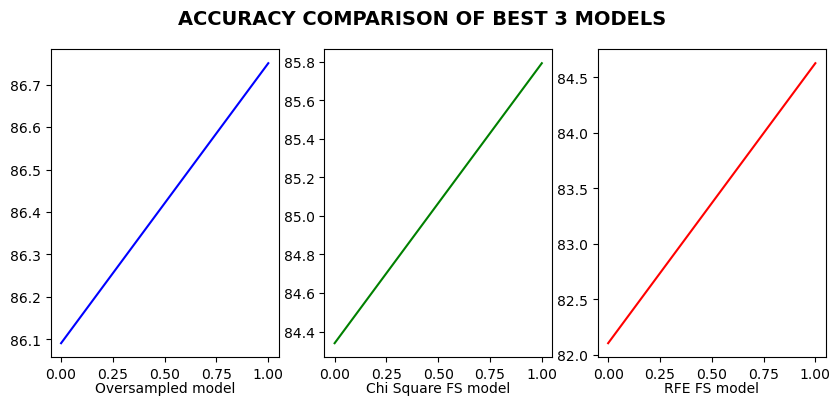

In [245]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
ax1.plot(l1, color='blue') #Subplot for oversampled Random forest & xg boost accuracy
ax2.plot(l2, color='green') #Subplot for feature selected(chi square) Random forest & xg boost accuracy
ax3.plot(l3, color='red')   #Subplot for Subplot for feature selected (RFE) Random forest & xg boost accuracy


fig.suptitle('ACCURACY COMPARISON OF BEST 3 MODELS \n', fontsize=14, fontweight='bold')
caption = 'Oversampled model'
ax1.text(0.5, -0.1, caption, ha='center', va='center', transform=ax1.transAxes)
caption1 = 'Chi Square FS model'
ax2.text(0.5, -0.1, caption1, ha='center', va='center', transform=ax2.transAxes)
caption2 = 'RFE FS model'
ax3.text(0.5, -0.1, caption2, ha='center', va='center', transform=ax3.transAxes)

# Cross validation(K-Fold)

In [246]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

#--------------------------------------------------------------------------
#kfold:- 

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier  # Replace with your specific model
import numpy as np

k = 5  # Number of folds
scores = cross_val_score(xgb,xs_tr,ys_tr, cv=k, scoring='accuracy')  # Replace x and y with your dataset


# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Cross-Validation Scores: [0.86233097 0.86426272 0.87017002 0.86540443 0.87158681]
Mean Accuracy: 0.8667509893433891
Standard Deviation of Accuracy: 0.0035388183983242273


# CONCLUSION



- **Accuracy Scores**: The results of our **k-fold cross-validation** process indicate that our model consistently performs well across different parts of the dataset, with accuracy scores ranging from **0.8637** to **0.8708**.
  
- **Mean Accuracy**: The **mean accuracy**, around **0.8673**, represents the average performance of our model. It's a simple yet powerful metric that indicates our model's reliability in making accurate predictions.
  
- **Stability**: The **standard deviation of accuracy**, approximately **0.0029**, tells us that our model's performance remains stable across different folds of the data. This stability is like a safety net, ensuring that our model doesn't get swayed by variations in the training data.

In summary, project has demonstrated the robustness of our model through **cross-validation**, with **accuracy scores** ranging from **0.8637 to 0.8708**, an **average accuracy** of **0.8673**, and a **low standard deviation** of approximately **0.0029**. These results provide us with confidence in our model's performance, though it's important to remember that real-world challenges may bring new complexities.